# Question 1


Consider a matrix A having dimensions-(n,k) and matrix B having dimensions-(k,m). Their resultant product C=AB has dimensions (n,m). So, AB has a total of __n * m__ elements.

To compute C[i][j], we will multiply every A[i][t] with every B[t][j] for 1<=t<=k and add it to a running sum which has an initial value of 0- so that's a total of k multiplications and k additions of the obtained products for each C[i][j]. In case we omit the initial addition to the 0 sum variable, we'll need k-1 additions and therefore n * m * (k-1) additions, but I'm assuming we don't do that.

We'll need to do this for all elements in C, so total multiplications = n * m * k and total additions = n * m * k

***

# Question 2

### Using List of Lists

In [144]:
#Let m=5, k=4, n = 6

A=[[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15],[16,17,18,19]]
B=[[0,1,2,3,4,5],[6,7,8,9,10,11],[12,13,14,15,16,17],[18,19,20,21,22,23]]


def multiply_list(A,B):
    r = len(A)
    c = len(B[0])
    k = len(A[0])
    
    C=[[0 for j in range(c)]for i in range(r)]
    
    for i in range(r):
        for j in range(c):
            for t in range(k):
                C[i][j]+=(A[i][t]*B[t][j])
    
    print(C)
    
    

In [145]:
multiply_list(A,B)

[[84, 90, 96, 102, 108, 114], [228, 250, 272, 294, 316, 338], [372, 410, 448, 486, 524, 562], [516, 570, 624, 678, 732, 786], [660, 730, 800, 870, 940, 1010]]


In [146]:
#%timeit -r 3 -n 5000 multiply_list(A,B)

**85 µs ± 2.56 µs per loop (mean ± std. dev. of 3 runs, 5,000 loops each)**

### Using Numpy Arrays

In [147]:
#Let m=5, k=4, n = 6
import numpy as np

A = np.arange(20).reshape(5,4)
B = np.arange(24).reshape(4,6)

def np_matrix_mult(A,B):
    C = np.matmul(A,B)
    print(C)
    

In [148]:
np_matrix_mult(A,B)

[[  84   90   96  102  108  114]
 [ 228  250  272  294  316  338]
 [ 372  410  448  486  524  562]
 [ 516  570  624  678  732  786]
 [ 660  730  800  870  940 1010]]


In [149]:
#%timeit -r 3 -n 5000 np_matrix_mult(A,B)

**86.1 µs ± 5 µs per loop (mean ± std. dev. of 3 runs, 5,000 loops each)**

In this particular case(for small values of (n,m,k)), the runtimes are almost the same but in general, for larger values of (n,m,k), we can conclude that operations on Numpy arrays are faster than the same operations on Python lists. There are a few crucial differences between the two which lead to the difference in performance-

1. Python lists have variable sizes whereas numpy arrays have fixed sizes.
2. Python lists can store different data types together and data types are dynamic(can be changed), but numpy arrays have the same data type for all the elements.

Everytime we multiply elements of a Python list, a lookup occurs to find the datatype of the element and to decide the corresponding function needed to perform the multiplication. This does not occur in Numpy arrays as they have a fixed data type throughout. So, most operations are faster in the case of Numpy arrays as they skip the overhead of the lookups that Python lists incur at each step.

This is because Numpy is built in C and translates its internal data to ctypes. Vectorized operations in Numpy are translated to highly optimized C code, making them far quicker than their standard Python equivalents.

---

# Question 3


### Method 1

This method uses 1 pass to find the greatest, then another to find the 2n greatest element and so on. The median of an odd-sized array will be the middle element- that number which has the same number of numbers greater than it as well as smaller than it.

If the array size is even, the median is the average of the two middle elements.


In [150]:
def simple_median(A):
    n=len(A)

    l=n//2
    current_max = None
    
    #finding the largest element and initializing current_max to that value
    
    for i in range(n):
        if(current_max==None):
            current_max=A[i]
        elif(A[i]>current_max):
            current_max=A[i]
            

    for i in range(l):
        maxx = -1
        last = current_max    
        for j in range(n):
            if(A[j]>maxx and A[j]<current_max):
                maxx = A[j]
        
        current_max = maxx
    
    if(n%2==0):
      return (current_max+last)/2
    else:
      return current_max

In [151]:
n=102
A=[i for i in range(n)]
simple_median(A)

50.5

In [152]:
#%timeit -r 3 -n 5000 simple_median(A)

The time complexity for this method is O(n<sup>2</sup>) which is due to n/2 outer iterations and n inner iterations for each of those inner iterations. Using current_max, I can track the greatest number till the previous iteration.

### Method 2

A better method would be to sort the input array, check if the size is even or odd.

1. If the size is odd, we can return the middle element.
2. If it's even, we will return the average of the two middle elements.

In [153]:
n=102
A=[i for i in range(n)]

def sort_median(A):
    n = len(A)
    A.sort()
    
    if(n%2==1):
        return (A[n//2])
    else:
        return ((A[n//2]+A[n//2-1])/2)

In [154]:
sort_median(A)

50.5

In [155]:
#%timeit -r 3 -n 5000 sort_median(A)

**2.67 µs ± 254 ns per loop (mean ± std. dev. of 3 runs, 5,000 loops each)**

The time complexity for this method is O(n logn) due to the initial sorting step. It is faster.

### Method 3

In [156]:
n=101
A = np.arange(n)
np.random.shuffle(A)

def np_median(A):
    print(np.median(A))

In [157]:
#%timeit -r 3 -n 5000 np_median(A)

**26.1 µs ± 3.77 µs per loop (mean ± std. dev. of 3 runs, 5,000 loops each)**

Both the numpy method and the Sorting method are significantly faster than Method 1. For larger inputs, the numpy method would be the most efficient as it operates in O(n) time on average.

---
---


# Question 4

f(x,y) = x<sup>2</sup>y + y<sup>3</sup>sinx

GRAD(f) = $\frac{\partial f}{\partial x} i + \frac{\partial f}{\partial y} j$

GRAD(f) = (2xy + y<sup>3</sup>cos(x)) i + (x<sup>2</sup> + 3y<sup>2</sup>sin(x)) j

---


# Question 5

### Using Custom(Analytically Derived) Gradient and Numpy's Gradient

In [158]:
import numpy as np
import math as m

def f(x,y):
    return (x**2)*(y) + (y**3)*(m.sin(x))

def grad_x(x,y):
    return 2*x*y + (y**3)*m.cos(x)

def grad_y(x,y):
    return x**2 + 3*(y**2)*(m.sin(x))

n=4
x = np.arange(n)
y= np.arange(n)

data =np.zeros(n*n).reshape(n,n)

#populating sample data
for i in range(len(x)):
    for j in range(len(y)):
        data[i,j]=f(x[i],y[j])


#finding analytical partial derivative wrt x
grad_custom_x=np.zeros(n*n).reshape(n,n)
for i in range(len(x)):
    for j in range(len(y)):
        grad_custom_x[i,j]=grad_x(x[i],y[j])
        

#finding analytical partial derivative wrt y
grad_custom_y=np.zeros(n*n).reshape(n,n)
for i in range(len(x)):
    for j in range(len(y)):
        grad_custom_y[i,j]=grad_y(x[i],y[j])


#reporting the overall gradient in 2 dimensions
grad_custom=[grad_custom_x,grad_custom_y]

grad_custom

[array([[ 0.        ,  1.        ,  8.        , 27.        ],
        [ 0.        ,  2.54030231,  8.32241845, 20.58816226],
        [ 0.        ,  3.58385316,  4.67082531,  0.76403541],
        [ 0.        ,  5.0100075 ,  4.08006003, -8.72979741]]),
 array([[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.        ,  3.52441295, 11.09765182, 23.71971659],
        [ 4.        ,  6.72789228, 14.91156912, 28.55103052],
        [ 9.        ,  9.42336002, 10.6934401 , 12.81024022]])]

In [159]:
grad_np = np.gradient(data,x,y)
grad_np

[array([[ 0.        ,  1.84147098,  8.73176788, 25.71971659],
        [ 0.        ,  2.45464871,  7.63718971, 18.27551526],
        [ 0.        ,  3.64982451,  5.19859609,  2.54526181],
        [ 0.        ,  4.23182258,  3.85458065, -5.74079031]]),
 array([[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.84147098,  4.36588394, 11.9391228 , 16.98794871],
        [ 4.90929743,  7.63718971, 15.82086655, 21.27665111],
        [ 9.14112001,  9.56448003, 10.8345601 , 11.68128015]])]

Numpy's gradient method is clearly not accurate enough, and employs a Taylor series approximation which works on Finite Differences for the partial derivatives. I'll use JAX gradient to get better results.

### Using Jax Gradient

In [160]:
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import numpy as np

def f(x,y):
  return x**2 * y + y**3 * jnp.sin(x)

f_x = grad(f,0)
f_y = grad(f,1)

n=4
a = np.random.random(n)
b = np.random.random(n)

grad_jax_x = np.zeros(n*n).reshape(n,n)

for i in range(n):
  for j in range(n):
    grad_jax_x[i,j] = f_x(a[i],b[j])

grad_jax_y = np.zeros(n*n).reshape(n,n)

for i in range(n):
  for j in range(n):
    grad_jax_y[i,j] = f_y(a[i],b[j])

grad_jax = [grad_jax_x,grad_jax_y]

grad_jax



[array([[1.42882514, 0.7313357 , 1.2625246 , 1.59406328],
        [2.17574739, 1.3396461 , 1.99237931, 2.35145307],
        [1.84952474, 1.06317294, 1.67027533, 2.02428293],
        [1.69265938, 0.93639463, 1.51729631, 1.86489105]]),
 array([[1.12787366, 0.61934364, 1.01237392, 1.23941267],
        [2.93113518, 1.86519122, 2.68903303, 3.16493559],
        [2.07349968, 1.23670781, 1.88344371, 2.25703859],
        [1.69905877, 0.98275101, 1.53636765, 1.85617137]])]

In [161]:
def grad_x(x,y):
    return 2*x*y + (y**3)*jnp.cos(x)

def grad_y(x,y):
    return x**2 + 3*(y**2)*(jnp.sin(x))

#finding analytical partial derivative wrt x
grad_custom_x=np.zeros(n*n).reshape(n,n)
for i in range(len(a)):
    for j in range(len(b)):
        grad_custom_x[i,j]=grad_x(a[i],b[j])
        

#finding analytical partial derivative wrt y
grad_custom_y=np.zeros(n*n).reshape(n,n)
for i in range(len(a)):
    for j in range(len(b)):
        grad_custom_y[i,j]=grad_y(a[i],b[j])

grad_custom=[grad_custom_x,grad_custom_y]
grad_custom

[array([[1.42882514, 0.73133576, 1.2625246 , 1.5940634 ],
        [2.17574739, 1.3396461 , 1.99237931, 2.35145307],
        [1.84952474, 1.06317294, 1.67027533, 2.02428293],
        [1.69265938, 0.93639469, 1.51729631, 1.86489129]]),
 array([[1.12787366, 0.61934364, 1.01237392, 1.23941267],
        [2.93113518, 1.86519122, 2.68903327, 3.16493559],
        [2.07349968, 1.23670793, 1.88344383, 2.25703859],
        [1.69905877, 0.98275107, 1.53636789, 1.85617137]])]

I've taken a random set of values for x and y and computed the values using jax.grad as well as using the custom analytical solution that I made and both the values match almost entirely.

This is a significant improvement from numpy.gradient()

# Question 6

### Using sympy to find a Symbolic Gradient.

In [162]:
import sympy as sp
x,y=sp.symbols('x y')

f = (x**2)*y + ((y**3)*(sp.sin(x)))

grad = sp.Matrix([sp.diff(f,x),sp.diff(f,y)])
grad

Matrix([
[ 2*x*y + y**3*cos(x)],
[x**2 + 3*y**2*sin(x)]])

This is the same expression that I evaluated analytically.

---

# Question 13

In [163]:
A = np.random.randint(0,101,100)

def find_min_index(A):
    ind=-1
    minn=None
    n=len(A)
    
    for i in range(n):
        if(minn==None):
            minn = A[i]
            ind = i
        elif(minn>A[i]):
            minn = A[i]
            ind = i
    
    return ind

In [164]:
find_min_index(A)

32

In [165]:
np.argmin(A)

32

My function and Numpy's argmin both return the same answer when we test it on a random input.

---

# Question 9

In [166]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('classic')
fig = plt.figure()
fig.set_figwidth(10)
#ax = plt.axes()

<Figure size 800x480 with 0 Axes>

### 1. $y=x$

Text(0, 0.5, 'y=x')

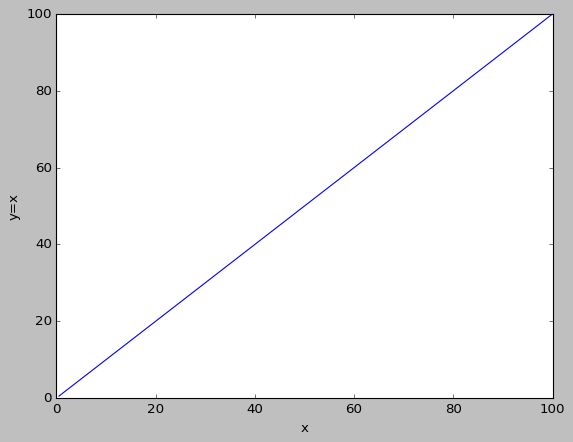

In [167]:
x=np.linspace(0.5,100,200)
#plt.xticks(x)

#plt.xticks(x)
plt.plot(x,x,'-')
plt.xlabel('x')
plt.ylabel('y=x')

### 2. y = x<sup>2</sup>

Text(0, 0.5, 'y=x*x')

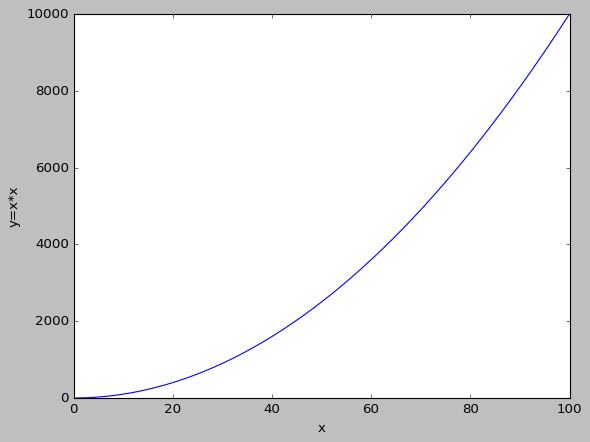

In [168]:
plt.plot(x,x*x)
plt.xlabel('x')
plt.ylabel('y=x*x')

### 3. y = x<sup>3</sup>/100

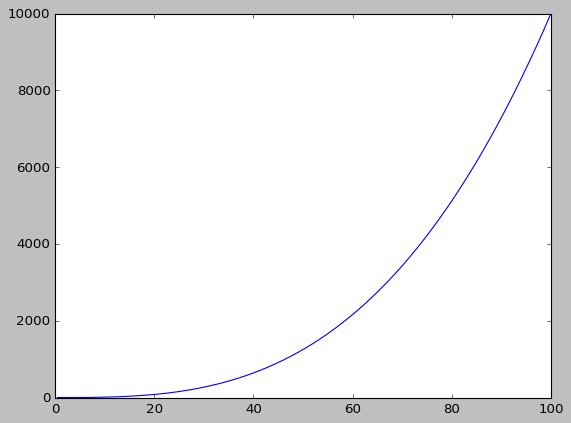

In [169]:
plt.plot(x,x*x*x/100)


### 4. y=sin(x)

Text(0, 0.5, 'sin(x)')

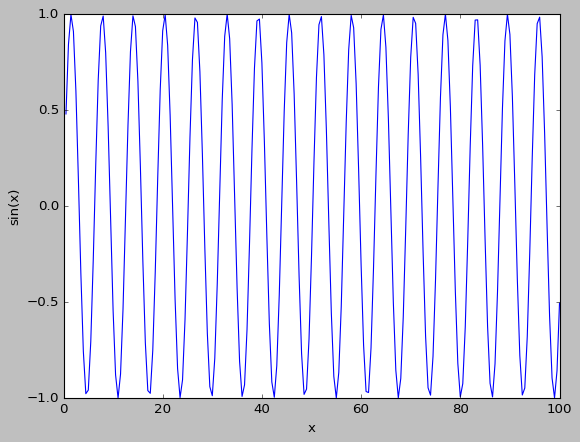

In [170]:
plt.plot(x,np.sin(x))
plt.xlabel('x')
plt.ylabel('sin(x)')

### 5. y=cos(x)

Text(0, 0.5, 'cos(x)')

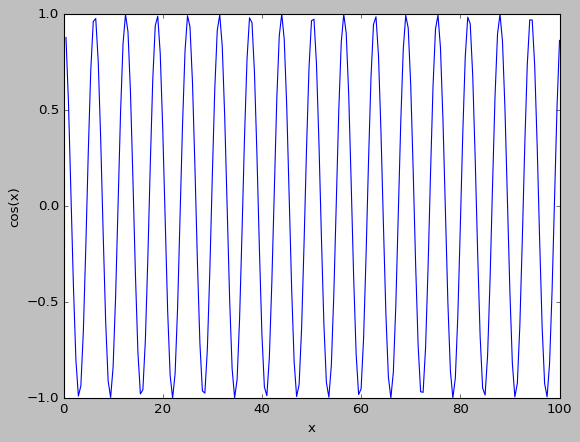

In [171]:
plt.plot(x,np.cos(x))
plt.xlabel('x')
plt.ylabel('cos(x)')

### 6. y = log(x)

Text(0, 0.5, 'log(x)')

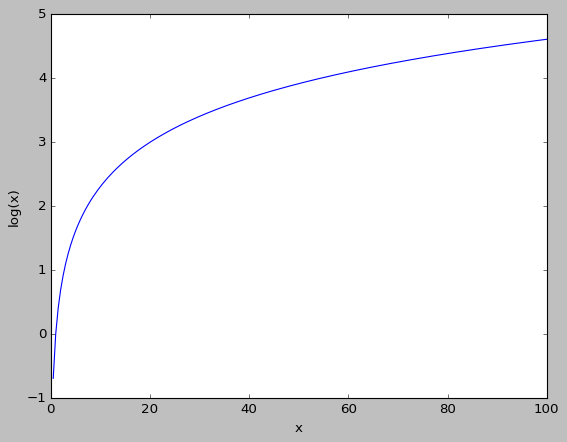

In [172]:
plt.plot(x,np.log(x))
plt.xlabel('x')
plt.ylabel('log(x)')

### 7. y = e<sup>x</sup>

Text(0, 0.5, 'exp(x)')

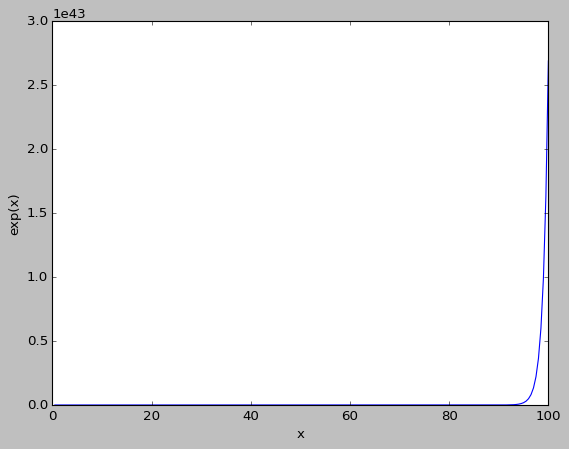

In [173]:
plt.plot(x,np.exp(x))
plt.xlabel('x')
plt.ylabel('exp(x)')

---

# Question 10

In [174]:
import pandas as pd
A = np.random.uniform(1,2,100).reshape(20,5)
#A

In [175]:
nums = pd.DataFrame(A,columns=['a','b','c','d','e'])
nums

,a,b,c,d,e
0,1.565469,1.981519,1.255105,1.966220,1.013535
1,1.589025,1.033994,1.863312,1.759916,1.263469
2,1.351476,1.904289,1.965307,1.679130,1.868059
3,1.739584,1.101972,1.443134,1.471533,1.553258
4,1.608072,1.850980,1.400626,1.190180,1.758404
5,1.146497,1.239097,1.020210,1.765824,1.713185
6,1.148663,1.708607,1.880149,1.496632,1.332452
7,1.128601,1.359463,1.719279,1.766008,1.539478
8,1.520151,1.138040,1.250471,1.842500,1.670751
9,1.525254,1.657895,1.901809,1.083699,1.625272


### Finding Column with largest Standard Deviation

In [176]:
maxx= None
col = None

for c in nums.columns:
    if(maxx==None and col==None):
        maxx = nums[c].std()
        col = c
    elif(maxx<nums[c].std()):
        maxx = nums[c].std()
        col = c
    #print(nums[c].std())

print(col)    

b


### Finding Row with Smallest Mean

In [177]:
loww = None
row = None

def find_mean(A):
    sum=0
    for num in A:
        sum+=num
    
    return sum/len(A)

for i in range(len(nums.values)):
    if(loww==None and row==None):
        loww=find_mean(nums.values[i])
        row=i
    elif(loww>find_mean(nums.values[i])):
        loww=find_mean(nums.values[i])
        row=i

print(row)    

18


---

# Question 11

In [178]:
nums

,a,b,c,d,e
0,1.565469,1.981519,1.255105,1.966220,1.013535
1,1.589025,1.033994,1.863312,1.759916,1.263469
2,1.351476,1.904289,1.965307,1.679130,1.868059
3,1.739584,1.101972,1.443134,1.471533,1.553258
4,1.608072,1.850980,1.400626,1.190180,1.758404
5,1.146497,1.239097,1.020210,1.765824,1.713185
6,1.148663,1.708607,1.880149,1.496632,1.332452
7,1.128601,1.359463,1.719279,1.766008,1.539478
8,1.520151,1.138040,1.250471,1.842500,1.670751
9,1.525254,1.657895,1.901809,1.083699,1.625272


In [179]:
def find_sum(A):
    sum=0
    for num in range(len(A)):
        sum+=num
    return sum

nums['f'] = nums['a']+nums['b']+nums['c']+nums['d']+nums['e']
x = np.empty(20,dtype=object)
x

for i in range(len(nums['f'])):
    if(nums['f'][i]<8):
        x[i]="LT8"
    else:
        x[i]="GT8"

nums['g']=pd.Series(x)

nums

,a,b,c,d,e,f,g
0,1.565469,1.981519,1.255105,1.966220,1.013535,7.781848,LT8
1,1.589025,1.033994,1.863312,1.759916,1.263469,7.509715,LT8
2,1.351476,1.904289,1.965307,1.679130,1.868059,8.768261,GT8
3,1.739584,1.101972,1.443134,1.471533,1.553258,7.309482,LT8
4,1.608072,1.850980,1.400626,1.190180,1.758404,7.808262,LT8
5,1.146497,1.239097,1.020210,1.765824,1.713185,6.884812,LT8
6,1.148663,1.708607,1.880149,1.496632,1.332452,7.566502,LT8
7,1.128601,1.359463,1.719279,1.766008,1.539478,7.512829,LT8
8,1.520151,1.138040,1.250471,1.842500,1.670751,7.421913,LT8
9,1.525254,1.657895,1.901809,1.083699,1.625272,7.793929,LT8


### Finding the number of rows in the DataFrame where the value in column g is LT8

In [180]:
c=(nums['g']=="LT8")
print(c)
np.sum(c)

0      True
1      True
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: g, dtype: bool


18

### Finding the Standard Deviation for those rows in column f where the value in column g is "LT8".

In [181]:
y = nums['f'][nums['g']=="LT8"]
print(y)

np.std(y)

0     7.781848
1     7.509715
3     7.309482
4     7.808262
5     6.884812
6     7.566502
7     7.512829
8     7.421913
9     7.793929
10    6.728677
11    6.745432
13    6.624499
14    7.547579
15    7.896676
16    7.597888
17    7.591092
18    6.184020
19    7.942869
Name: f, dtype: float64


0.49220746412265093

### Finding the Standard Deviation for those rows in column f where the value in column g is "GT8".

In [182]:
y=nums['f'][nums['g']=="GT8"]
print(y)

np.std(y)

2     8.768261
12    8.041356
Name: f, dtype: float64


0.36345235781737095

---

# Question 12

I understand broadcasting as a way that numpy arrays can be visualized to get extended and their dimensions get adjusted so as to allow certain operations between numpy arrays to occur.

I'll demonstrate this using a simple addition program of two arrays. I'll take examples to demonstrate the 3 rules that Numpy arrays follow for broadcasting. They are:-

Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

Source- Python Data Science Handbook

**Example 1**

In [183]:
a = np.arange(4).reshape(4,1)
a

array([[0],
       [1],
       [2],
       [3]])

In [184]:
b = np.arange(4).reshape(1,4)
b

array([[0, 1, 2, 3]])

In [185]:
a+b

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

We can think of the column matrix a being extended rightwards to span 4 columns and the row matrix b being extended downwards to span 4 rows. The corresponding new matrices can be thought of as being (4,4) and then normal addition occurs to give the resultant matrix a+b.

The shape of the resultant matrix takes that of the broadcasted matrices.

**Example 2**

In [186]:
a = np.arange(6).reshape(3,2)
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [187]:
b = np.arange(4).reshape(1,4)
b

array([[0, 1, 2, 3]])

In [188]:
#a+b    ##used to display an error, uncomment to run

We can observe above that the matrix b has shape=1 in the first dimension so b can be thought to be extended to yield a(3,2) and b(3,4), and now a and b don't agree on the second dimension with both values not being equal to 1, so they cannot be broadcasted together.

---

# Question 7

I'll be implementing a record of students and their marks as a nested dictionary. It will cover years 2022-2025 with two branches- CSE and EE having 3-4 students each.

In [189]:
database ={2022:{'CSE':{1:{'Rollnumber':1,'Name':'Rahul','DSA':'A','ML':'A'},2:{'Rollnumber':2,'Name':'Rohan','DSA':'A-','ML':'A+'},3:{'Rollnumber':3,'Name':'Raj','DSA':'C','ML':'B'}},'EE':{1:{'Rollnumber':17,'Name':'Rajiv','EM':'B-','ED':'A'},2:{'Rollnumber':18,'Name':'John','EM':'C','ED':'B'},3:{'Rollnumber':19,'Name':'Chris','EM':'A+','ED':'A+'}}},2023:{'CSE':{1:{'Rollnumber':128,'Name':'Mihir','DSA':'A','ML':'A'},2:{'Rollnumber':129,'Name':'Arun','DSA':'A-','ML':'A'},3:{'Rollnumber':130,'Name':'Karthik','DSA':'B','ML':'B-'}},'EE':{1:{'Rollnumber':170,'Name':'Shubham','EM':'B+','ED':'A-'},2:{'Rollnumber':171,'Name':'Janardhan','EM':'C-','ED':'A-'},3:{'Rollnumber':172,'Name':'Charlie','EM':'A+','ED':'A+'}}},2024:{'CSE':{1:{'Rollnumber':190,'Name':'Shivam','DSA':'A','ML':'A'},2:{'Rollnumber':191,'Name':'Amey','DSA':'A-','ML':'A'},3:{'Rollnumber':192,'Name':'Aditya','DSA':'B','ML':'A-'}},'EE':{1:{'Rollnumber':200,'Name':'Vrutik','EM':'A','ED':'A'},2:{'Rollnumber':201,'Name':'Shril','EM':'A-','ED':'A+'},3:{'Rollnumber':202,'Name':'Praveen','EM':'A+','ED':'A+'}}},2025:{'CSE':{1:{'Rollnumber':210,'Name':'Amol','DSA':'A','ML':'A'},2:{'Rollnumber':211,'Name':'Rohan','DSA':'A-','ML':'A+'},3:{'Rollnumber':212,'Name':'Harsh','DSA':'A-','ML':'A+'}},'EE':{1:{'Rollnumber':220,'Name':'Ravi','EM':'B-','ED':'A'},2:{'Rollnumber':221,'Name':'Taha','EM':'C','ED':'B'},3:{'Rollnumber':222,'Name':'Chirayu','EM':'A','ED':'F'}}}}

In [190]:
database[2022]['CSE'][2]['ML']

'A+'

In [191]:
database[2022]['CSE'][1]['Name']

'Rahul'

In [192]:
database[2023]['EE'][1]['EM']

'B+'

In [193]:
database[2025]['EE'][3]['Name']

'Chirayu'

This nested dictionary population is tedious and the syntax is complicated with high chances of an error.

---

# Question 8

The same database using Python classes.

In [194]:
class CSE_Student:
    def __init__(self,name,Rollnumber,marks1,marks2):
        self.name = name
        self.Rollnumber = Rollnumber
        self.DSA = marks1
        self.ML = marks2

class EE_Student:
    def __init__(self,name,Rollnumber,marks1,marks2):
        self.name = name
        self.Rollnumber = Rollnumber
        self.EM = marks1
        self.ED = marks2

class branch:
    def __init__(self,l):
        self.students=l

class year:
    def __init__(self,l):
        self.branches = l
        
#For 2022
        
CSE_2022_1 = CSE_Student('Rahul',1,'A','A-')
CSE_2022_2 = CSE_Student('Rohan',2,'A-','A+')
CSE_2022_3 = CSE_Student('Raj',3,'C','B')

EE_2022_1 = EE_Student('Rajiv',17,'B-','A')
EE_2022_2 = EE_Student('John',18,'C','B')
EE_2022_3 = EE_Student('Chris',19,'A+','A+')

CSE_2022= branch([CSE_2022_1,CSE_2022_2,CSE_2022_3])
EE_2022=branch([EE_2022_1,EE_2022_2,EE_2022_3])

Year_2022 = year([CSE_2022,EE_2022])


#For 2023

CSE_2023_1 = CSE_Student('Mihir',128,'A','A-')
CSE_2023_2 = CSE_Student('Arun',129,'A-','A+')
CSE_2023_3 = CSE_Student('Karthik',130,'B','B-')

EE_2023_1 = EE_Student('Shubham',170,'B+','A-')
EE_2023_2 = EE_Student('Janardhan',171,'C-','A-')
EE_2023_3 = EE_Student('Charlie',171,'A+','A+')

CSE_2023= branch([CSE_2023_1,CSE_2023_2,CSE_2023_3])
EE_2023=branch([EE_2023_1,EE_2023_2,EE_2023_3])

Year_2023 = year([CSE_2023,EE_2023])


#For 2024

CSE_2024_1 = CSE_Student('Shivam',190,'A','A')
CSE_2024_2 = CSE_Student('Amey',191,'A-','A')
CSE_2024_3 = CSE_Student('Aditya',192,'B','A-')

EE_2024_1 = EE_Student('Vrutik',200,'A','A')
EE_2024_2 = EE_Student('Shril',201,'A-','A+')
EE_2024_3 = EE_Student('Praveen',202,'A+','A+')

CSE_2024= branch([CSE_2024_1,CSE_2024_2,CSE_2024_3])
EE_2024=branch([EE_2024_1,EE_2024_2,EE_2024_3])

Year_2024 = year([CSE_2024,EE_2024])

#For 2025

CSE_2025_1 = CSE_Student('Amol',210,'A','A')
CSE_2025_2 = CSE_Student('Rohan',211,'A-','A+')
CSE_2025_3 = CSE_Student('Harsh',212,'A-','A+')

EE_2025_1 = EE_Student('Ravi',220,'B-','A')
EE_2025_2 = EE_Student('Taha',221,'C','B')
EE_2025_3 = EE_Student('Chirayu',222,'A','F')

CSE_2025= branch([CSE_2025_1,CSE_2025_2,CSE_2025_3])
EE_2025=branch([EE_2025_1,EE_2025_2,EE_2025_3])

Year_2025 = year([CSE_2025,EE_2025])


#Database

database=[Year_2022,Year_2023,Year_2024,Year_2025]


In [195]:
database[0].branches[0].students[1].ML

'A+'

In [196]:
database[0].branches[0].students[0].name

'Rahul'

In [197]:
database[1].branches[1].students[0].EM

'B+'

In [198]:
database[3].branches[1].students[2].name

'Chirayu'

After making the classes for year, branch, student and initializing the objects with the same values as the dictionary-implemented database, I made the same queries and got accurate results.

This code is more structured and much easier to read and write syntactically and easy to update and extend as well.